# Decision Tree (SUV purchase Use Case)

#### 1. Initial Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#### 2. Load data
Load Pandas DataFrame from CSV file

In [2]:
suv_data = pd.read_csv('suv.csv')

#### 3. Build the independent and dependent variable arrays

During the exploratory analysis phase, I chose 'Age', 'Gender' and 'EstimatedSalary' as the *independent variables*; and set 'Purchased' as the *dependent variable*.

This means that the decision tree will try to predict whether a client will purchase an SUV car (1) or not (0) depending on the clients age, gender and salary; or a subset of these.

Remember the structure of the DataFrame:

In [3]:
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


I will not need the User ID column.

In addition, I remove 'Gender' column, as after going over all the process, the decision trees that I built never included this variable in a decision node:

In [4]:
clean_data = suv_data.drop(['User ID', 'Gender'], axis=1)
clean_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Ensure that there are no null values in this cleaned DataFrame:

In [5]:
print(clean_data.isnull().sum().sum())

0


Extract X (dependent variables) and y (independent variable) from the cleaned DataFrame:

In [6]:
X = clean_data.drop(['Purchased'], axis=1)
y = clean_data['Purchased'].values
print(X.head(), '\n')
print(y[0:10])

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000 

[0 0 0 0 0 0 0 1 0 0]


#### 4. Split into train and test data

Given a test size (in this case, 25% of the whole sample), randomly divide the entries between train data, which will be used to train the model; and test data, which will be used to test the model's predictions.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
len(X_train), len(X_test)

(300, 100)

#### 5. Build and train decision tree

Import DecisionTreeClassifier class and initialise object:

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

Fit the train data to the model:

In [9]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

#### 6. Plot decision tree

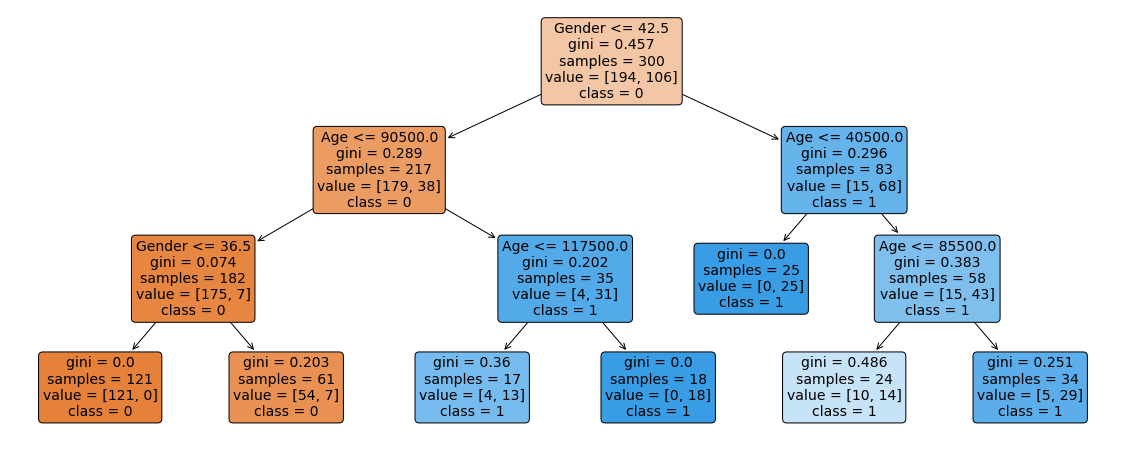

In [10]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,8))
plot_tree(clf, 
          feature_names=['Gender', 'Age', 'EstimatedSalary'], 
          class_names=['0', '1'], 
          fontsize=14, filled=True, rounded=True)
plt.show()

<!-- #### 11. Apply decision tree to test data and check results -->

#### 7. Apply decision tree to test data and check results

In [11]:
y_pred = clf.predict(X_test)

Build confusion matrix:

In [12]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
pd.DataFrame(cf_matrix, columns=['Predicted 0s','Predicted 1s'], index=['Actual 0s','Actual 1s'])

,Predicted 0s,Predicted 1s
Actual 0s,57,6
Actual 1s,2,35


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.85      0.95      0.90        37

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.92      0.92      0.92       100



#### 8. Try different decision trees

The previous decision tree shows great results, but let's try different values for max_depth:

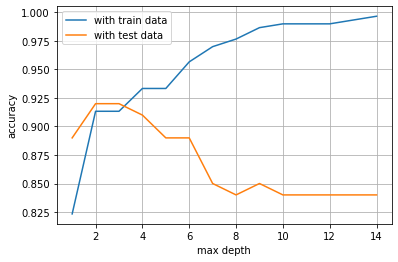

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depths = []
train_accuracies = []
test_accuracies = []

for max_depth in range(1, 15):
    
    max_depths.append(max_depth)
    
    # build and train tree
    clf = DecisionTreeClassifier(max_depth=max_depth,
                                 random_state=42)
    clf.fit(X_train, y_train)
    
    # predict train data
    y_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred)
    train_accuracies.append(train_acc)
    
    # predict test data
    y_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    test_accuracies.append(test_acc)
    
plt.plot(max_depths, train_accuracies)
plt.plot(max_depths, test_accuracies)
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend(['with train data', 'with test data'])
plt.grid()
plt.show()

Clearly, if we go for more than 3 levels, the decision tree suffers from overfitting.

Another way of limiting the levels and decision nodes is adding a minimum impurity decrease for a decision node to be included in the tree, by providing a "min_impurity_decrease" argument to the DecisionTreeClassifier.

In any case, it looks like a decision tree with a maximum depth of 2 levels is good enough for our dataset:

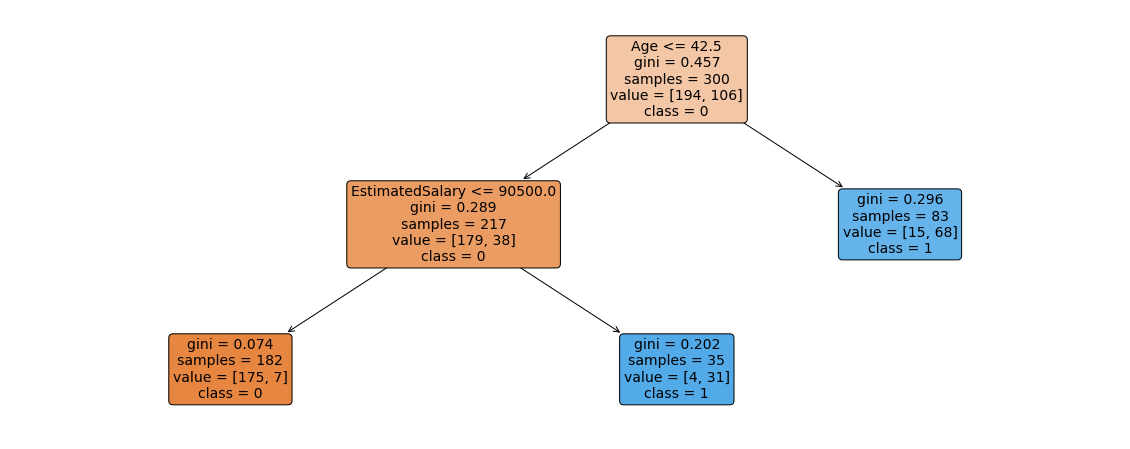

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.85      0.95      0.90        37

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.92      0.92      0.92       100


           Predicted 0s  Predicted 1s
Actual 0s            57             6
Actual 1s             2            35



In [15]:
# Build and train final decision tree
clf = DecisionTreeClassifier(max_depth=max_depth,
                                 min_impurity_decrease=0.05,
                                 random_state=42)
clf.fit(X_train, y_train)

# plot decision tree
plt.figure(figsize=(20,8))
plot_tree(clf, 
          feature_names=list(X.columns), 
          class_names=['0', '1'], 
          fontsize=14, filled=True, rounded=True)
plt.show()

# predict test data
y_pred = clf.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matriz
cf_matrix = confusion_matrix(y_test, y_pred)
print('\n{}\n'.format(pd.DataFrame(cf_matrix, 
                                   columns=['Predicted 0s','Predicted 1s'], 
                                   index=['Actual 0s','Actual 1s'])))

We can visualise in the "EstimatedSalary", "Age" 2D space how the decision tree is classifying the data, and compare it to the real classifications of each data point:

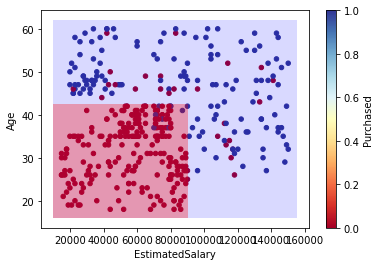

In [16]:
age_threshold = 42.5
min_age = min(suv_data['Age']) - 2
max_age = max(suv_data['Age']) + 2

salary_threshold = 90500
min_salary = min(suv_data['EstimatedSalary']) - 5000
max_salary = max(suv_data['EstimatedSalary']) + 5000

suv_data.plot.scatter(x='EstimatedSalary', y='Age', c='Purchased', colormap='RdYlBu', sharex=False)

plt.fill_between([min_salary, max_salary], [max_age, max_age], [min_age, min_age], 
                 facecolor='blue', alpha=0.15)
plt.fill_between([min_salary, salary_threshold], [age_threshold, age_threshold], [min_age, min_age], 
                 facecolor='red', alpha=0.3)
plt.show()